In [1]:
from tensorflow import keras
from dev.preprocessing import points_to_displacement

In [2]:
def sum(x, y):
    return x + y

In [3]:
shape_face = (99, 472, 3)
shape_hand = (99, 42, 3)

face_input = keras.Input(shape=shape_face, dtype='float32', name='face_Input')
hand_input = keras.Input(shape=shape_hand, dtype='float32', name='hand_Input')

vectorize_face = keras.layers.Flatten()(face_input)
vectorize_hand = keras.layers.Flatten()(hand_input)

x_face = keras.layers.Dense(64, activation='relu')(vectorize_face)
x_hand = keras.layers.Dense(64, activation='relu')(vectorize_hand)

vector = keras.layers.Lambda(sum)([x_face, x_hand])
out = keras.layers.Dense(1, activation='linear')(vector)

model = keras.Model(inputs=[face_input, hand_input], outputs=out)

2022-12-23 11:43:53.652624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 11:43:53.673427: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 11:43:53.673540: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 11:43:53.673855: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

TypeError: Exception encountered when calling layer "lambda" (type Lambda).

sum() missing 1 required positional argument: 'y'

Call arguments received by layer "lambda" (type Lambda):
  • inputs=['tf.Tensor(shape=(None, 64), dtype=float32)', 'tf.Tensor(shape=(None, 64), dtype=float32)']
  • mask=None
  • training=None

In [6]:
from tensorflow.keras.utils import plot_model

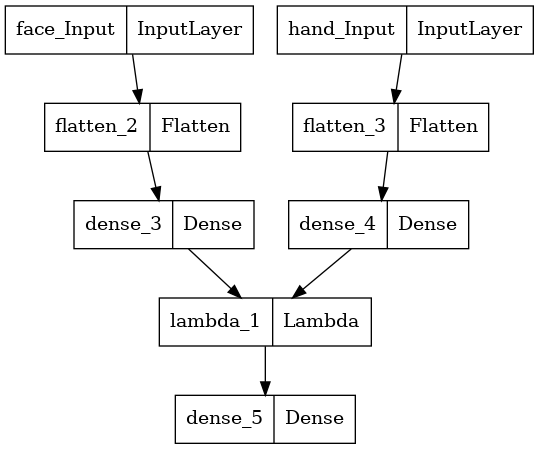

In [7]:
plot_model(model, to_file='./model.png')